In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold

In [2]:
np.random.seed(0)

In [3]:
dogs_whisker_length = np.random.normal(loc=5, scale=1, size=10)
dogs_ears_flappiness_index = np.random.normal(loc=8, scale=1, size=10)

In [4]:
cats_whisker_length = np.random.normal(loc=8, scale=1, size=10)
cats_ears_flappiness_index = np.random.normal(loc=5, scale=1, size=10)

In [12]:
# Combination the data
dogs_data = np.vstack((dogs_whisker_length, dogs_ears_flappiness_index)).T
cats_data = np.vstack((cats_whisker_length, cats_ears_flappiness_index)).T
data = np.vstack((dogs_data, cats_data))
labels = np.hstack((np.zeros(len(dogs_data)), (np.ones(len(cats_data)))))

In [7]:
labels

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [13]:
# Split data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [14]:
X_train

array([[ 4.89678115,  8.3130677 ],
       [ 4.02272212,  8.33367433],
       [ 8.6536186 ,  5.37816252],
       [ 7.2408932 ,  8.12167502],
       [ 9.53277921,  4.61267318],
       [ 8.04575852,  6.23029068],
       [ 7.25783498,  3.01920353],
       [ 5.97873798,  8.76103773],
       [ 5.4105985 ,  7.14590426],
       [ 9.46935877,  4.69769725],
       [ 6.86755799,  8.44386323],
       [ 8.8644362 ,  4.11221425],
       [ 4.84864279,  7.79484174],
       [ 5.44701018,  5.15494743],
       [10.26975462,  4.65208785],
       [ 5.95008842,  9.49407907]])

In [15]:
Y_test

array([0., 1., 1., 0.])

In [16]:
X_test

array([[6.76405235, 8.14404357],
       [7.81281615, 6.20237985],
       [6.54563433, 5.15634897],
       [5.40015721, 9.45427351]])

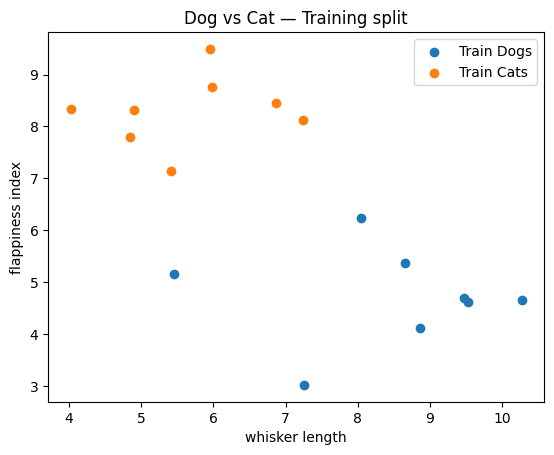

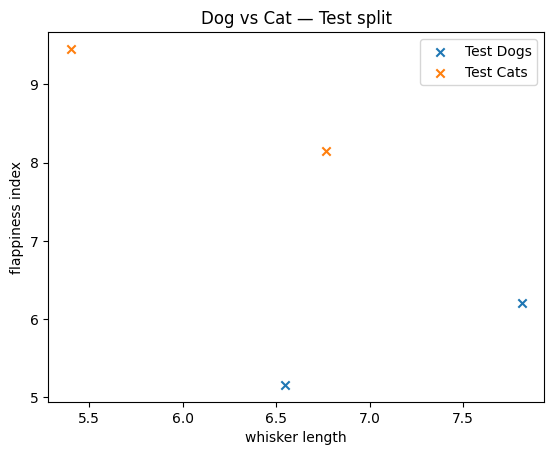

In [19]:
# Masks (training)
dogs_tr = (Y_train == 1)
cats_tr = (Y_train == 0)

# Masks (test)
dogs_te = (Y_test == 1)
cats_te = (Y_test == 0)

# ---- Plot TRAIN split ----
plt.figure()
plt.scatter(X_train[dogs_tr][:, 0], X_train[dogs_tr][:, 1], label="Train Dogs")
plt.scatter(X_train[cats_tr][:, 0], X_train[cats_tr][:, 1], label="Train Cats")
plt.xlabel("whisker length")
plt.ylabel("flappiness index")
plt.title("Dog vs Cat — Training split")
plt.legend()
plt.show()

# ---- Plot TEST split ----
plt.figure()
plt.scatter(X_test[dogs_te][:, 0], X_test[dogs_te][:, 1], label="Test Dogs", marker="x")
plt.scatter(X_test[cats_te][:, 0], X_test[cats_te][:, 1], label="Test Cats", marker="x")
plt.xlabel("whisker length")
plt.ylabel("flappiness index")
plt.title("Dog vs Cat — Test split")
plt.legend()
plt.show()


In [21]:
# Implementing Python code to run the alogorithum
# d == 2 , number of features ( whisker length, flappiness index)
def random_linear_classifier(data_dogs, data_cats, k , d):
    best_error = float('inf')
    best_theta = None
    best_theta0 = None

    for _ in range(k):
        theta = np.random.normal(size=d) # 01x1 +02x2
        theta0 = np.random.normal() #theta0

        error = compute_error(data_dogs, data_cats, theta, theta0)

        if error < best_error:
            best_error = error
            best_theta = theta
            best_theta0 = theta0

    return best_theta, best_theta0

def compute_error(data_dogs, data_cats, theta, theta0):
    error = 0
    for x_dog in data_dogs:
        if np.dot(theta, x_dog)+theta0 <= 0:
            error+=1
    for x_cat in data_cats:
        if np.dot(theta, x_cat)+theta0 > 0:
            error+=1
    return error

         
         

In [23]:
# Now random linear classifier algo run on training data 
k = 100
d = 2
best_theta_train, best_theta0_train, train_error = random_linear_classifier(X_train[Y_train == 0], X_train[Y_train == 1], k, d)

ValueError: not enough values to unpack (expected 3, got 2)